In [1]:
import pandas as pd
import numpy as np

# ——————————————
# 1) PARAMETERS
# ——————————————
np.random.seed(42)
n_customers = 5000

# ——————————————
# 2) SIMULATE FEATURES
# ——————————————
# IDs
customer_ids = [f"CUST_{i:05d}" for i in range(1, n_customers+1)]

# Demographics
ages = np.clip(np.random.normal(40, 12, n_customers), 18, 80).astype(int)
genders = np.random.choice(["Male", "Female"], n_customers, p=[0.48, 0.52])
marital_status = np.random.choice(
    ["Single", "Married", "Divorced", "Widowed"],
    n_customers, p=[0.4, 0.45, 0.1, 0.05]
)
regions = np.random.choice(
    ["North", "South", "East", "West"],
    n_customers, p=[0.25, 0.25, 0.25, 0.25]
)

# Engagement & behavior
loyalty_scores = np.clip(np.random.normal(5, 2, n_customers), 1, 10)
frequency = np.random.poisson(8, n_customers)            # purchases/month
recency = np.random.randint(1, 366, n_customers)         # days since last purchase
discount_response = np.random.beta(2, 5, n_customers)    # % of discounts used

# Spend metrics
avg_basket = np.random.lognormal(np.log(200), 0.5, n_customers).round(2)
annual_expenditure = (frequency * avg_basket * 12).round(2)

# Psychographics / preferences
customer_type = np.random.choice(
    ["Occasional", "Regular", "Brand-Loyal", "Discount-Seeker"],
    n_customers, p=[0.2, 0.4, 0.2, 0.2]
)
channel_pref = np.random.choice(
    ["Online", "In-Store", "Mixed"],
    n_customers, p=[0.3, 0.5, 0.2]
)
tenure_years = np.round(np.random.uniform(0.1, 10, n_customers), 1)
returns_rate = np.random.beta(1, 10, n_customers).round(2)
satisfaction = np.random.choice([1,2,3,4,5], n_customers, p=[0.1,0.2,0.4,0.2,0.1])
category_pref = np.random.choice(
    ["Snacks","Beverages","Dairy","Household","Personal_Care"],
    n_customers, p=[0.3,0.2,0.2,0.2,0.1]
)

# ——————————————
# 3) ASSEMBLE & SAVE
# ——————————————
df_customers = pd.DataFrame({
    "Customer_ID":           customer_ids,
    "Age":                   ages,
    "Gender":                genders,
    "Marital_Status":        marital_status,
    "Region":                regions,
    "Loyalty_Score":         loyalty_scores,
    "Frequency":             frequency,
    "Recency":               recency,
    "Discount_Response_Rate":discount_response.round(2),
    "Average_Basket_Value":  avg_basket,
    "Annual_Expenditure":    annual_expenditure,
    "Customer_Type":         customer_type,
    "Channel_Preference":     channel_pref,
    "Tenure_Years":          tenure_years,
    "Returns_Rate":          returns_rate,
    "Satisfaction_Score":    satisfaction,
    "Category_Pref":         category_pref
})

# Save for clustering
df_customers.to_csv("customer_segmentation_data.csv", index=False)

# Quick peek
print(df_customers.shape)
print(df_customers.head())


(5000, 17)
  Customer_ID  Age Gender Marital_Status Region  Loyalty_Score  Frequency  \
0  CUST_00001   45   Male         Single  South       5.097697          9   
1  CUST_00002   38   Male         Single  South       3.666710          9   
2  CUST_00003   47   Male       Divorced   East       5.993476          6   
3  CUST_00004   58   Male        Married  South       2.683996          5   
4  CUST_00005   37   Male         Single  North       9.329785          6   

   Recency  Discount_Response_Rate  Average_Basket_Value  Annual_Expenditure  \
0      249                    0.50                247.68            26749.44   
1      110                    0.45                354.34            38268.72   
2       30                    0.28                252.10            18151.20   
3      358                    0.05                123.10             7386.00   
4       85                    0.28                106.38             7659.36   

  Customer_Type Channel_Preference  Tenure_Ye

In [2]:
import pandas as pd

# Load your prepared dataset
df = pd.read_csv("customer_segmentation_data.csv")
print(df.head())
print(df.info())


  Customer_ID  Age Gender Marital_Status Region  Loyalty_Score  Frequency  \
0  CUST_00001   45   Male         Single  South       5.097697          9   
1  CUST_00002   38   Male         Single  South       3.666710          9   
2  CUST_00003   47   Male       Divorced   East       5.993476          6   
3  CUST_00004   58   Male        Married  South       2.683996          5   
4  CUST_00005   37   Male         Single  North       9.329785          6   

   Recency  Discount_Response_Rate  Average_Basket_Value  Annual_Expenditure  \
0      249                    0.50                247.68            26749.44   
1      110                    0.45                354.34            38268.72   
2       30                    0.28                252.10            18151.20   
3      358                    0.05                123.10             7386.00   
4       85                    0.28                106.38             7659.36   

  Customer_Type Channel_Preference  Tenure_Years  Return

In [3]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Example: Encoding categorical features if needed
categorical_cols = df.select_dtypes(include='object').columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Scale features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


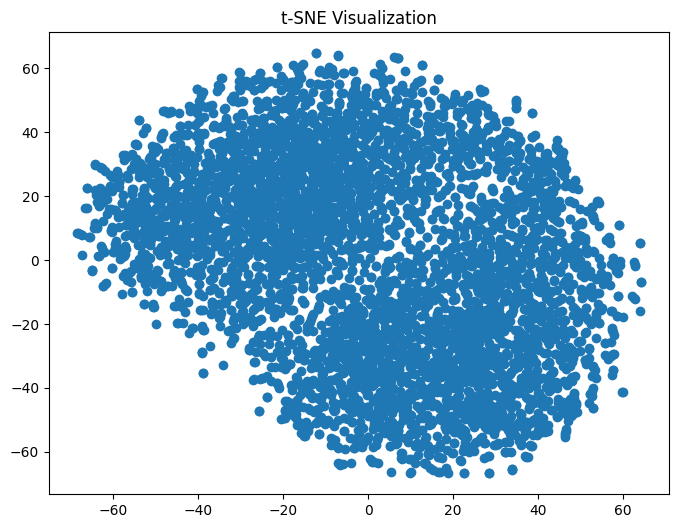

In [4]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.title("t-SNE Visualization")
plt.show()


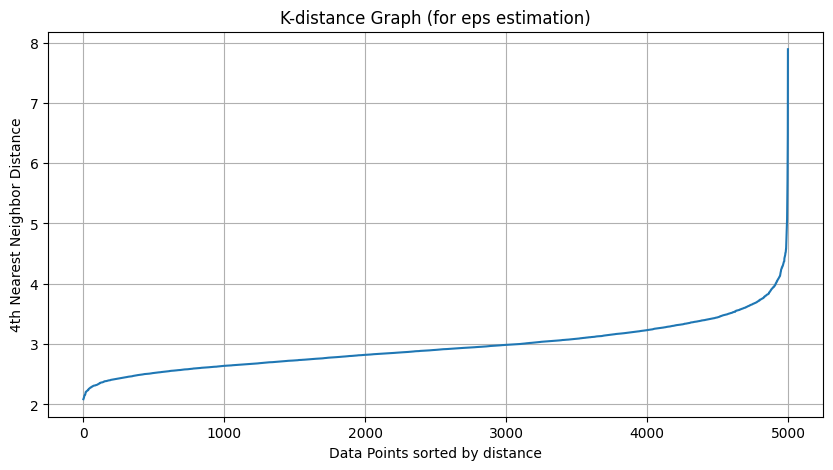

In [5]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Fit Nearest Neighbors
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(scaled_data)
distances, indices = neighbors_fit.kneighbors(scaled_data)

# Sort and plot the distances
distances = np.sort(distances[:, 4])
plt.figure(figsize=(10, 5))
plt.plot(distances)
plt.title("K-distance Graph (for eps estimation)")
plt.xlabel("Data Points sorted by distance")
plt.ylabel("4th Nearest Neighbor Distance")
plt.grid(True)
plt.show()


In [7]:

from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=5, min_samples=5)
clusters = dbscan.fit_predict(scaled_data)

df['Cluster'] = clusters
print("New Cluster Summary:", dict(zip(*np.unique(clusters, return_counts=True))))


New Cluster Summary: {np.int64(-1): np.int64(5), np.int64(0): np.int64(4995)}


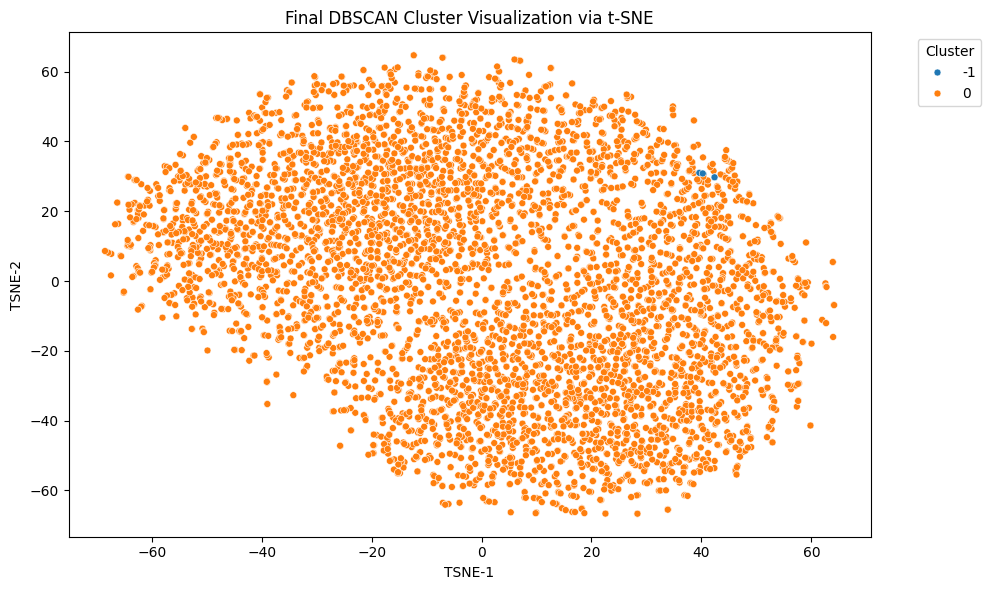

In [8]:
import seaborn as sns

# t-SNE for 2D projection
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_results = tsne.fit_transform(scaled_data)

df['TSNE-1'] = tsne_results[:, 0]
df['TSNE-2'] = tsne_results[:, 1]

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TSNE-1', y='TSNE-2', hue='Cluster', palette='tab10', s=25)
plt.title("Final DBSCAN Cluster Visualization via t-SNE")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [9]:
# Save to CSV
df.to_csv("final_customer_segments.csv", index=False)
print("✅ Clustered data saved as 'final_customer_segments1.csv'")


✅ Clustered data saved as 'final_customer_segments1.csv'


In [12]:
import pandas as pd

df = pd.read_csv("customer_segmentation_data.csv")
print(df.columns.tolist())
print(df.head())


['Customer_ID', 'Age', 'Gender', 'Marital_Status', 'Region', 'Loyalty_Score', 'Frequency', 'Recency', 'Discount_Response_Rate', 'Average_Basket_Value', 'Annual_Expenditure', 'Customer_Type', 'Channel_Preference', 'Tenure_Years', 'Returns_Rate', 'Satisfaction_Score', 'Category_Pref']
  Customer_ID  Age Gender Marital_Status Region  Loyalty_Score  Frequency  \
0  CUST_00001   45   Male         Single  South       5.097697          9   
1  CUST_00002   38   Male         Single  South       3.666710          9   
2  CUST_00003   47   Male       Divorced   East       5.993476          6   
3  CUST_00004   58   Male        Married  South       2.683996          5   
4  CUST_00005   37   Male         Single  North       9.329785          6   

   Recency  Discount_Response_Rate  Average_Basket_Value  Annual_Expenditure  \
0      249                    0.50                247.68            26749.44   
1      110                    0.45                354.34            38268.72   
2       30   

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import joblib

# Load your customer dataset
df = pd.read_csv("customer_segmentation_data.csv")

# Map the required columns
df["Income"] = df["Annual_Expenditure"]  # Assuming "Income" can be derived from Annual Expenditure
df["Spending_Score"] = df["Average_Basket_Value"]  # Assuming "Spending_Score" can be derived from Basket Value
df["Tenure"] = df["Tenure_Years"]  # Renaming Tenure_Years to Tenure

# Now we select the features needed for segmentation
features = [
    "Income", "Spending_Score", "Recency", "Age", "Loyalty_Score", "Tenure", "Frequency"
]

# Prepare the feature matrix
X = df[features]

# Scale the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train the DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

# Show the cluster distribution
print("Cluster counts:", dict(zip(*np.unique(clusters, return_counts=True))))

# Save the trained models for use in FastAPI
joblib.dump(scaler, "models/dbscan_scaler.joblib")
joblib.dump(dbscan, "models/dbscan_customer_model.joblib")


Cluster counts: {np.int64(-1): np.int64(4989), np.int64(0): np.int64(6), np.int64(1): np.int64(5)}


['models/dbscan_customer_model.joblib']

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import DBSCAN
import joblib

# Load the final dataset
df = pd.read_csv("customer_segmentation_data.csv")

# Encode categorical features
categorical_cols = [
    'Gender', 'Marital_Status', 'Region', 'Customer_Type',
    'Channel_Preference', 'Category_Pref'
]
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# 🔥 Remove non-numeric or non-informative features
df = df.drop(columns=["Customer_ID"])  # Drop this!

# Define features to use
features = df.columns.tolist()  # Use all remaining columns

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# Train DBSCAN
dbscan = DBSCAN(eps=2, min_samples=5)
dbscan.fit(X_scaled)

# Save model & scaler
joblib.dump(scaler, "models/dbscan_scaler.joblib")
joblib.dump(dbscan, "models/dbscan_customer_model.joblib")

print("✅ Saved model and scaler based on cleaned feature set.")


✅ Saved model and scaler based on cleaned feature set.


In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import DBSCAN
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from joblib import dump

# Load data
df = pd.read_csv("customer_segmentation_data.csv")

# Drop ID column if present
df = df.drop(columns=["Customer_ID"])

# Categorical columns
cat_cols = ["Gender", "Marital_Status", "Region", "Customer_Type", "Channel_Preference", "Category_Pref"]
num_cols = [col for col in df.columns if col not in cat_cols]

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(sparse_output=False, handle_unknown="ignore"), cat_cols)
])

# DBSCAN parameters – tune `eps` if needed
dbscan = DBSCAN(eps=1.5, min_samples=10)

# Full pipeline
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("clustering", dbscan)
])

# Fit model
pipeline.fit(df)

# Save the pipeline
dump(pipeline, "dbscan_customer_pipeline.joblib")


['dbscan_customer_pipeline.joblib']

In [9]:
import joblib
pipe = joblib.load("models/dbscan_customer_pipeline.joblib")
pipe.named_steps


{'preprocessor': ColumnTransformer(transformers=[('num', StandardScaler(),
                                  ['Age', 'Loyalty_Score', 'Frequency',
                                   'Recency', 'Discount_Response_Rate',
                                   'Average_Basket_Value', 'Annual_Expenditure',
                                   'Tenure_Years', 'Returns_Rate',
                                   'Satisfaction_Score']),
                                 ('cat',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse_output=False),
                                  ['Gender', 'Marital_Status', 'Region',
                                   'Customer_Type', 'Channel_Preference',
                                   'Category_Pref'])]),
 'clustering': DBSCAN(eps=1.5, min_samples=10)}

In [10]:
import pandas as pd
from joblib import load

pipeline = load("models/dbscan_customer_pipeline.joblib")

input_dict = {
    "Age": 35,
    "Gender": 1,
    "Marital_Status": 1,
    "Region": 2,
    "Loyalty_Score": 9.0,
    "Frequency": 10,
    "Recency": 30,
    "Discount_Response_Rate": 0.6,
    "Average_Basket_Value": 450.0,
    "Annual_Expenditure": 20000,
    "Customer_Type": 1,
    "Channel_Preference": 0,
    "Tenure_Years": 5.0,
    "Returns_Rate": 0.02,
    "Satisfaction_Score": 5,
    "Category_Pref": 2
}

df = pd.DataFrame([input_dict])
print(df.dtypes)


Age                         int64
Gender                      int64
Marital_Status              int64
Region                      int64
Loyalty_Score             float64
Frequency                   int64
Recency                     int64
Discount_Response_Rate    float64
Average_Basket_Value      float64
Annual_Expenditure          int64
Customer_Type               int64
Channel_Preference          int64
Tenure_Years              float64
Returns_Rate              float64
Satisfaction_Score          int64
Category_Pref               int64
dtype: object


In [11]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from joblib import dump

# Load dataset
df = pd.read_csv("customer_segmentation_data.csv")
df = df.drop(columns=["Customer_ID"])

numerical_cols = [
    "Age", "Loyalty_Score", "Frequency", "Recency",
    "Discount_Response_Rate", "Average_Basket_Value",
    "Annual_Expenditure", "Tenure_Years", "Returns_Rate", "Satisfaction_Score"
]
categorical_cols = [
    "Gender", "Marital_Status", "Region",
    "Customer_Type", "Channel_Preference", "Category_Pref"
]

# Pipeline
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
])

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("clustering", KMeans(n_clusters=3, random_state=42))
])

pipeline.fit(df)

# Save pipeline in current environment
dump(pipeline, "models/kmeans_customer_pipeline.joblib")
print("✅ KMeans pipeline retrained and saved.")


✅ KMeans pipeline retrained and saved.
